# Data Description
This dataset contain two types of data for a combinatorial library containing approximately 14,000 compounds that we call ZEL024. This library was designed with the goal of inhibiting the RNA methyltransferase, METTL3, which has gained considerable attention as a target to treat cancer and inflammatory diseases. Controls in this library include the compounds STC15 and STM2457, known inhibitors of METTL3 developed by Storm Therapeutics. Phenotypic imaging data was collected from H1650 cells and transcriptome data was collected from HEK293T cells. Each data type was collected from 2 different devices. Imaging data is provided as 1 "plain" HDF5 file per array, and each HDF5 file is accompanied by 2 CSV files which describe the first 2 dimensions of the "images" dataset in the HDF5 file; the last two dimensions are image height and image width. Transcriptome counts data is provided in an AnnData-format HDF5 file, and the metadata is stored in the .obs DataFrame. The source device for the transcriptome data is available in the device_id column of the .obs DataFrame.

In total, there are approximately 55,300 transcriptome observations and 26,500 phenotype observations.

All observations are described by 5 columns of metadata: control_rx_id, bb1_id, bb2_id, bb3_id, bb4_id, and censored. The censored column indicates that the chemical identity information for that well has been hidden, and all the values for the other columns ending in _id should be -1. About 20% of the data has been censored.

In [1]:
%pip install scanpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import scanpy as sc

In [24]:
adata = sc.read_h5ad("4073_4074.h5ad")
adata

AnnData object with n_obs × n_vars = 55296 × 36601
    obs: 'device_id', 'control_rx_id', 'bb1_id', 'bb2_id', 'bb3_id', 'bb4_id', 'censored'

In [25]:
adata.obs

,device_id,control_rx_id,bb1_id,bb2_id,bb3_id,bb4_id,censored
0,4073,-1,-1,-1,-1,-1,True
1,4073,-1,207,418,1,1943,False
2,4073,-1,213,123,2,1943,False
3,4073,-1,202,422,2,1943,False
4,4073,-1,201,422,1,1943,False
...,...,...,...,...,...,...,...
55291,4074,-1,205,352,1,1559,False
55292,4074,-1,213,422,1,1559,False
55293,4074,-1,222,123,1,1559,False
55294,4074,-1,205,417,1,1559,False


In [7]:
adata.var

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC141272.1
AC023491.2
AC007325.1
AC007325.4


## Preprocessing

In [26]:
print(adata.obs["censored"].unique())
print(adata.shape)

[ True False]
(55296, 36601)


In [27]:
adata = adata[adata.obs["censored"] == False]
print(adata.shape)

(44237, 36601)


- Removing censored data because we don't know which building blocks they contain. We can see that obs value has decreased from 55296 to 44237 after removing process.

In [14]:
sc.pp.calculate_qc_metrics(adata,  percent_top=None, log1p=False, inplace=True)

- Removing low quality cells.

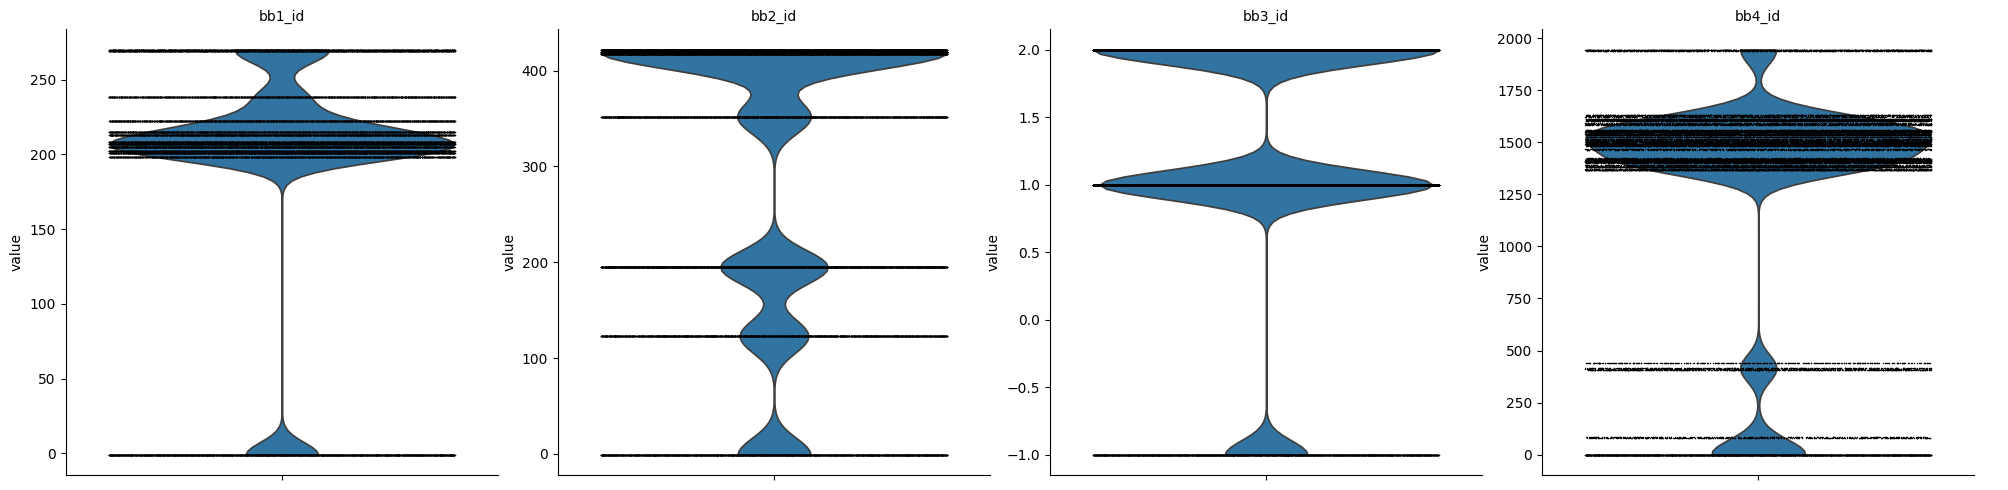

In [28]:
sc.pl.violin(adata, ["bb1_id", "bb2_id", "bb3_id", "bb4_id"],jitter=0.4, multi_panel=True)

- Here, we can see violin plot of building blocks. We are going to filter data according to that.

### Filtering

In [42]:
sc.pp.filter_cells(adata, min_genes=-1)
sc.pp.filter_cells(adata, max_genes=2000)
sc.pp.filter_genes(adata, min_cells=3)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\preprocessing\_simple.py:168: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


### Normalizing

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4) 
sc.pp.log1p(adata)

- Normalizing with counts per million.
- Taking the log(1+x) of each value.


In [45]:
adata

AnnData object with n_obs × n_vars = 14472 × 2671
    obs: 'device_id', 'control_rx_id', 'bb1_id', 'bb2_id', 'bb3_id', 'bb4_id', 'censored', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

- After filtering and normalizing, 14472 cells and 2671 genes are left.

In [47]:
adata.obs

,device_id,control_rx_id,bb1_id,bb2_id,bb3_id,bb4_id,censored,n_genes
1,4073,-1,207,418,1,1943,False,1005
6,4073,-1,202,420,2,1943,False,786
9,4073,-1,207,418,2,1943,False,1986
10,4073,-1,215,417,1,1943,False,1580
12,4073,-1,205,195,2,1943,False,1134
...,...,...,...,...,...,...,...,...
55289,4074,-1,215,123,2,1559,False,862
55290,4074,-1,201,417,2,1559,False,1756
55291,4074,-1,205,352,1,1559,False,921
55292,4074,-1,213,422,1,1559,False,1907


In [48]:
adata.var

,n_cells,highly_variable,means,dispersions,dispersions_norm,mean,std
SAMD11,1150,True,0.330988,1.703688,2.185957,0.137207,0.475531
AGRN,77,True,0.025157,1.714309,0.660840,0.009086,0.126136
AURKAIP1,5319,True,1.158559,1.691283,0.563993,0.682653,0.925501
ATAD3B,970,True,0.276026,1.670528,0.776628,0.113653,0.431582
AL691432.2,102,True,0.032873,1.729029,0.771292,0.011935,0.144128
...,...,...,...,...,...,...,...
MT-ND4,7785,True,1.615721,1.807057,2.070054,1.090065,1.065646
MT-ND5,3079,True,0.756867,1.695168,1.671864,0.378003,0.744893
MT-CYB,8010,True,1.726605,2.008189,5.794256,1.159097,1.108863
AC011043.1,104,True,0.033644,1.695395,0.518922,0.012270,0.146244


---

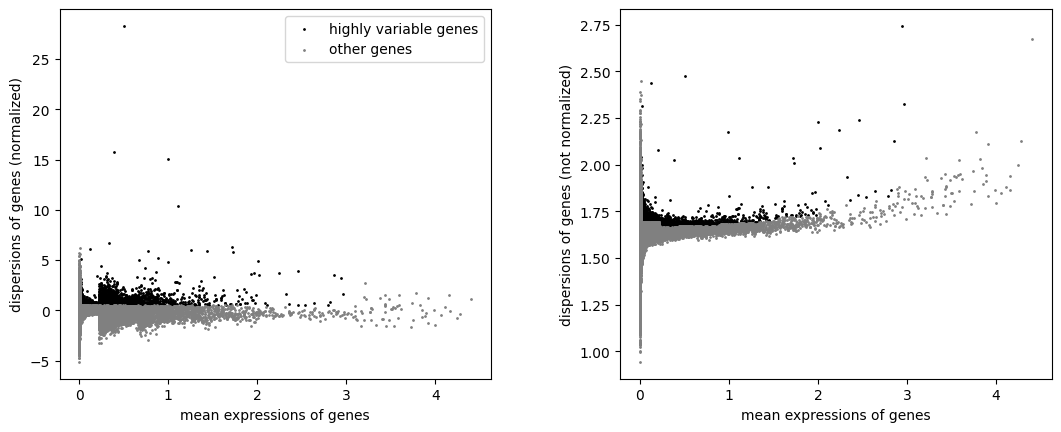

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\preprocessing\_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 14472 × 2671
    obs: 'device_id', 'control_rx_id', 'bb1_id', 'bb2_id', 'bb3_id', 'bb4_id', 'censored', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [44]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]

sc.pp.scale(adata, max_value=10) # subtract the mean expression value and divide by the standard deviation
adata

Getting highly variable genes are for to get more significant genes and ignore the others.

### Clustering

In [50]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

In [52]:
sc.tl.leiden(adata)

C:\Users\HP\AppData\Local\Temp\ipykernel_1368\3467744858.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


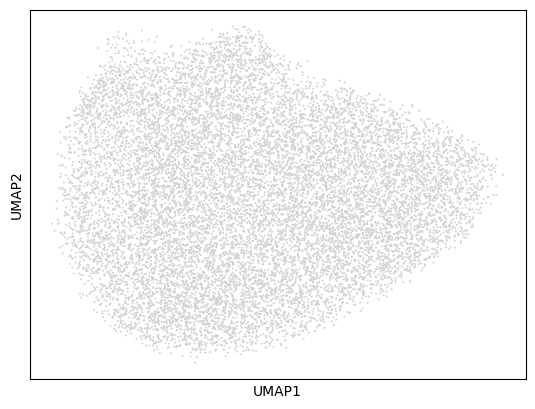

In [56]:
sc.pl.umap(adata)

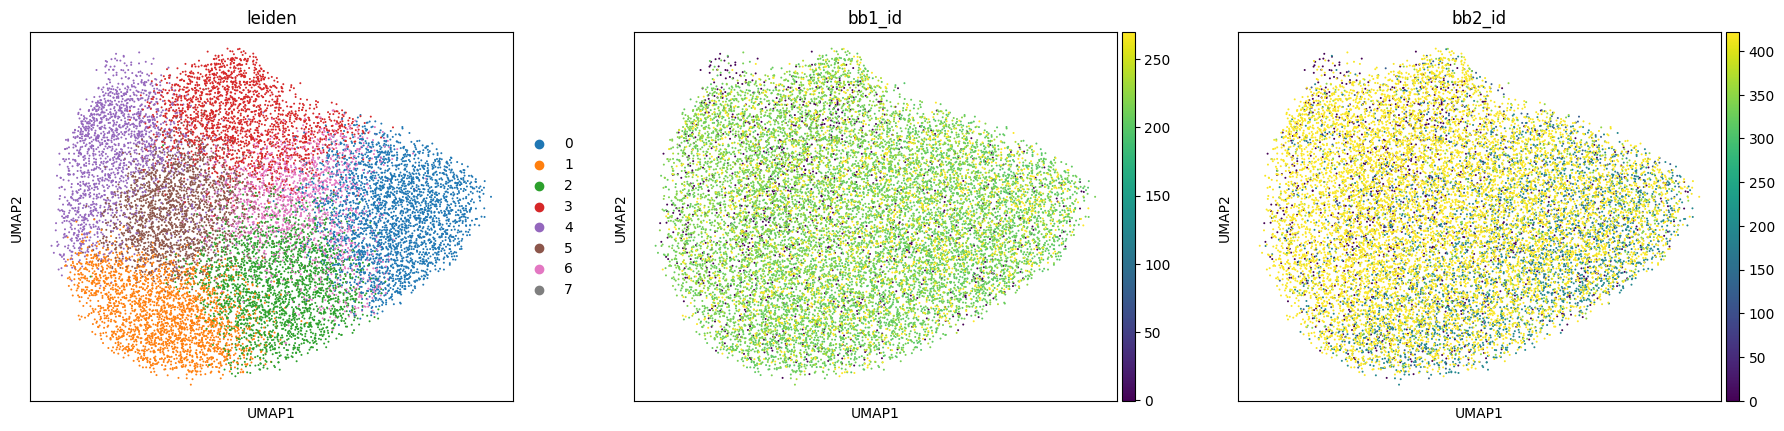

In [54]:
sc.pl.umap(adata, color=["leiden", "bb1_id", "bb2_id"], ncols=3)

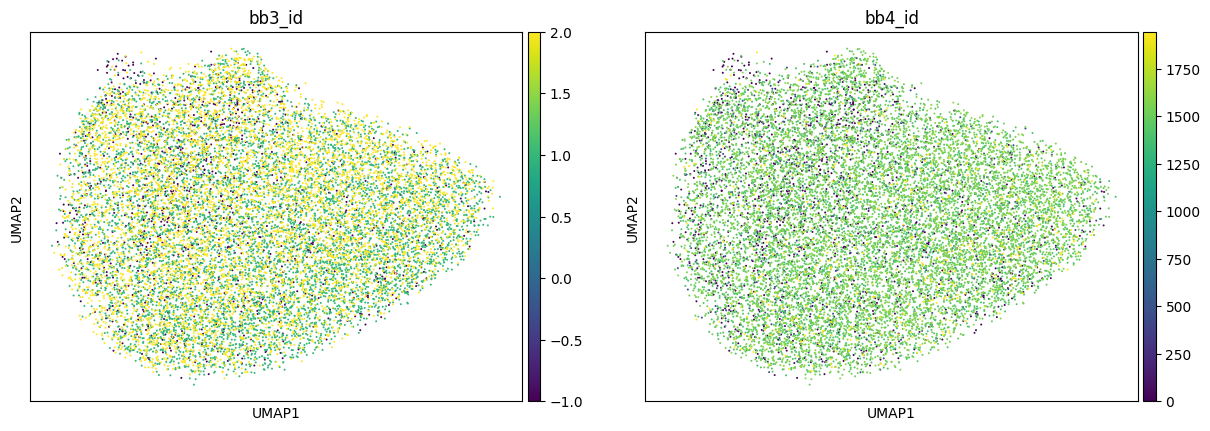

In [55]:
sc.pl.umap(adata, color=["bb3_id", "bb4_id"], ncols=2)